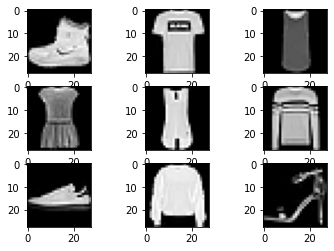

In [15]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()#ข้อมูลแบ่งเป็น 2  กลุ่ม

for i in range(9):
  plt.subplot(331 + i) # 331 = 3  row 3 col 0 map
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()

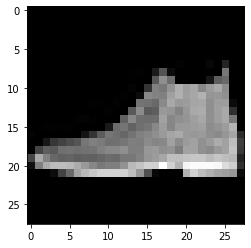

9


In [17]:
x = x_test[0]
plt.imshow(x, cmap='gray')
plt.show()
y = y_test[0]
print(y)

In [76]:
#ตามอาจารย์
import statistics
def distance (x,y):
  return np.sqrt(np.sum((x-y)**2))

y = y_test[0]
# print(y)
# plt.imshow(x,cmap='gray')
# plt.show()
# y = y_test[0]
# print(y)
def Knn (x,x_train,y_train,k):
  dist=[]

  num_train = x_train.shape[0]
  for i,x_t in enumerate (x_train):
    d=distance(x,x_t)
    y=y_train[i]
    dist.append((d,y))

  dist.sort()

  data = [v[1]for v in dist[0:k]]
  ans = max(data,key=data.count)
  return ans
correct=0
no=20
predict = []
for i,x in enumerate (x_test[0:no]):
  a= Knn(x,x_train,y_train,5)
  predict.append(a)
  #y=y_test[i]
  #if a==y:
    #correct+=1
#print(correct)
#print("accuracy = "+str(correct/no*100)+"%")

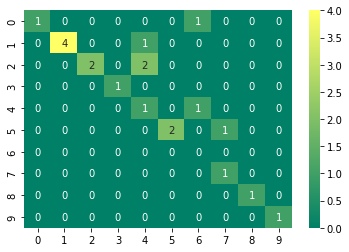

In [77]:
import seaborn as snb
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(np.array(predict),y_test[0:20])
snb.heatmap(cm,annot=True,cmap='summer')

In [78]:
#แก้อันเก่า
def dist(x,y): 
  return np.sqrt(np.sum(np.square(x-y)))

def Knn(x, train, y_train):
  k = 5
  l = []
  for i in range(x_train.shape[0]): 
    d = dist(x, x_train[i])
    l.append((d,y_train[i]))
  l.sort()
  top_k = l[0:k]
  label_k = [v[1] for v in top_k]
  ans = max(label_k, key= label_k.count)
  return ans

x1 = x_train[0]
x2 = x_train[1]

correct = 0
test = 20
ans = []
#for i in range(test):#1000 test
  #ans = Knn(x_test[i], x_train, y_train)
  #if ans == y_test[i]:
    #correct += 1

for i in range(test):#1000 test
  ans.append(Knn(x_test[i], x_train, y_train))

#print(ans)
#print(y_test[0:test])
#print(str(correct/test*100)+"%")
#print(ans, y_test[0])

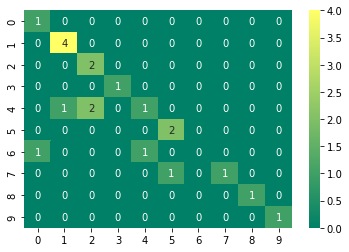

In [72]:
from seaborn.matrix import heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sbn

conf = confusion_matrix(np.array(y_test[0:test]),np.array(ans))
sbn.heatmap(conf, annot=True, cmap='summer')